In [1]:
from setting import *

%matplotlib inline

bt version :  (0, 2, 10)


In [2]:
tickers = ['TQQQ','TMF']

In [3]:
data = getHistoryByYf(tickers, tickers)
print('data \n', data)
assets = data.resample('M').last().dropna()
print('assets \n', assets)

[*********************100%***********************]  2 of 2 completed
data 
                  TQQQ       TMF
Date                           
2010-02-11   0.431471  6.695423
2010-02-12   0.433238  6.771188
2010-02-16   0.450019  6.831800
2010-02-17   0.457656  6.613165
2010-02-18   0.466332  6.500602
...               ...       ...
2022-11-25  22.260000  8.540000
2022-11-28  21.280001  8.610000
2022-11-29  20.770000  8.290000
2022-11-30  23.559999  8.450000
2022-12-01  23.690001  9.280000

[3225 rows x 2 columns]
assets 
                  TQQQ        TMF
Date                            
2010-02-28   0.463890   7.117540
2010-03-31   0.577927   6.638205
2010-04-30   0.613152   7.299414
2010-05-31   0.473034   8.506558
2010-06-30   0.383727   9.931690
...               ...        ...
2022-08-31  27.809999  11.329190
2022-09-30  19.320000   8.570000
2022-10-31  20.950001   6.960000
2022-11-30  23.559999   8.450000
2022-12-31  23.690001   9.280000

[155 rows x 2 columns]


In [4]:
# 오리지널 듀얼모멘텀 데이터(비교자산, 안전자산)
dualtickers = ['BND','BIL']

dualdata = getHistoryByYf(dualtickers, dualtickers)
dualdata = pd.merge(data, dualdata, how='outer', on='Date')
dualdata = dualdata.sort_values(by=['Date'],ascending=True)
dualassets = dualdata.resample('M').last().dropna()

[*********************100%***********************]  2 of 2 completed


In [5]:
selected = getDualMomentumAsset(dualassets, 12, 1, tickers, dualtickers)
print('selected \n', selected.head(30))
print(selected.tail())
original_dualMomentum = Selected_Asset_BT(dualassets, selected, name="Original DM")

selected 
              TQQQ    TMF    BND    BIL
Date                                  
2010-02-28  False  False  False  False
2010-03-31  False  False  False  False
2010-04-30  False  False  False  False
2010-05-31  False  False  False  False
2010-06-30  False  False  False  False
2010-07-31  False  False  False  False
2010-08-31  False  False  False  False
2010-09-30  False  False  False  False
2010-10-31  False  False  False  False
2010-11-30  False  False  False  False
2010-12-31  False  False  False  False
2011-01-31  False  False  False  False
2011-02-28   True  False  False  False
2011-03-31   True  False  False  False
2011-04-30   True  False  False  False
2011-05-31   True  False  False  False
2011-06-30   True  False  False  False
2011-07-31   True  False  False  False
2011-08-31   True  False  False  False
2011-09-30  False   True  False  False
2011-10-31  False   True  False  False
2011-11-30  False   True  False  False
2011-12-31  False   True  False  False
2012-01-31  Fa

In [6]:
dualMomentum_r2_m = {}
for i in range(0, 12):
    selected = getDualMomentumAsset(dualassets, i+1, 2, tickers, dualtickers)
    print('selected for period {}'.format(i+1), selected.head(20))
    print(selected.head(20))
    dualMomentum_r2_m[i] = Selected_Asset_BT(dualassets, selected, 'DM_r2_m_{}'.format(str(i+1)))

selected for period 1              TQQQ    TMF    BND    BIL
Date                                  
2010-02-28  False  False  False  False
2010-03-31   True  False  False   True
2010-04-30   True   True  False  False
2010-05-31  False   True  False   True
2010-06-30  False   True  False   True
2010-07-31   True  False  False   True
2010-08-31  False   True  False   True
2010-09-30   True  False  False   True
2010-10-31   True  False  False   True
2010-11-30  False  False  False   True
2010-12-31   True  False  False   True
2011-01-31   True  False  False   True
2011-02-28   True   True  False  False
2011-03-31  False  False  False   True
2011-04-30   True   True  False  False
2011-05-31  False   True  False   True
2011-06-30  False  False  False   True
2011-07-31   True   True  False  False
2011-08-31  False   True  False   True
2011-09-30  False   True  False   True
             TQQQ    TMF    BND    BIL
Date                                  
2010-02-28  False  False  False  False
201

Stat                 Equally Weighted
-------------------  ------------------
Start                2010-02-27
End                  2022-12-31
Risk-free rate       0.00%

Total Return         1585.99%
Daily Sharpe         3.97
Daily Sortino        7.08
CAGR                 24.61%
Max Drawdown         -74.42%
Calmar Ratio         0.33

MTD                  5.19%
3m                   16.63%
6m                   -12.30%
YTD                  -67.70%
1Y                   -67.70%
3Y (ann.)            -7.72%
5Y (ann.)            6.29%
10Y (ann.)           19.54%
Since Incep. (ann.)  24.61%

Daily Sharpe         3.97
Daily Sortino        7.08
Daily Mean (ann.)    567.63%
Daily Vol (ann.)     143.02%
Daily Skew           -0.54
Daily Kurt           1.25
Best Day             24.57%
Worst Day            -31.92%

Monthly Sharpe       0.87
Monthly Sortino      1.55
Monthly Mean (ann.)  27.21%
Monthly Vol (ann.)   31.30%
Monthly Skew         -0.54
Monthly Kurt         1.23
Best Month           24.57%


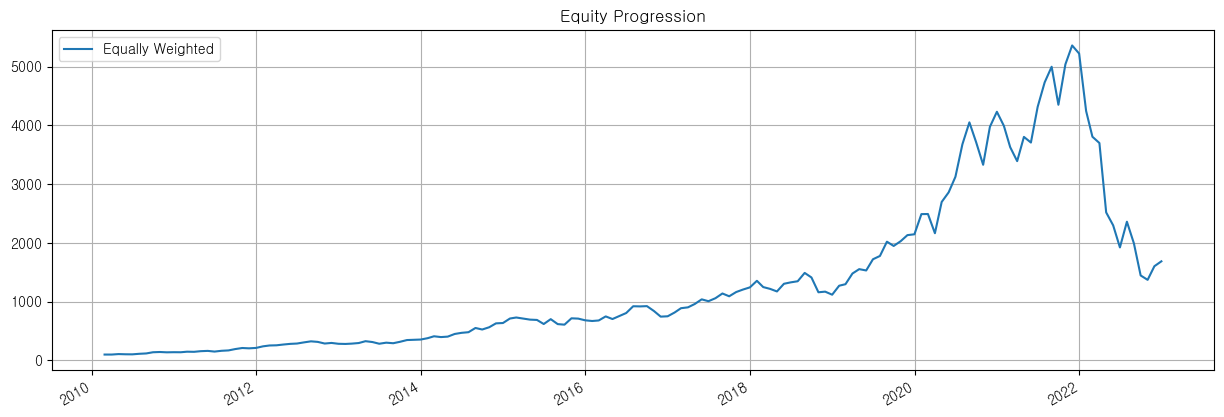

In [7]:
equalWeight = Equal_Weight_BT(assets, name='Equally Weighted')
report = bt.run(equalWeight)
report.plot()
report.display()

In [8]:
report = bt.run(original_dualMomentum, *dualMomentum_r2_m.values())

Stat                 Original DM    DM_r2_m_1    DM_r2_m_2    DM_r2_m_3    DM_r2_m_4    DM_r2_m_5    DM_r2_m_6    DM_r2_m_7    DM_r2_m_8    DM_r2_m_9    DM_r2_m_10    DM_r2_m_11    DM_r2_m_12
-------------------  -------------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  ------------  ------------  ------------
Start                2010-02-27     2010-02-27   2010-02-27   2010-02-27   2010-02-27   2010-02-27   2010-02-27   2010-02-27   2010-02-27   2010-02-27   2010-02-27    2010-02-27    2010-02-27
End                  2022-12-31     2022-12-31   2022-12-31   2022-12-31   2022-12-31   2022-12-31   2022-12-31   2022-12-31   2022-12-31   2022-12-31   2022-12-31    2022-12-31    2022-12-31
Risk-free rate       0.00%          0.00%        0.00%        0.00%        0.00%        0.00%        0.00%        0.00%        0.00%        0.00%        0.00%         0.00%         0.00%

Total Return         72.66%         484.58

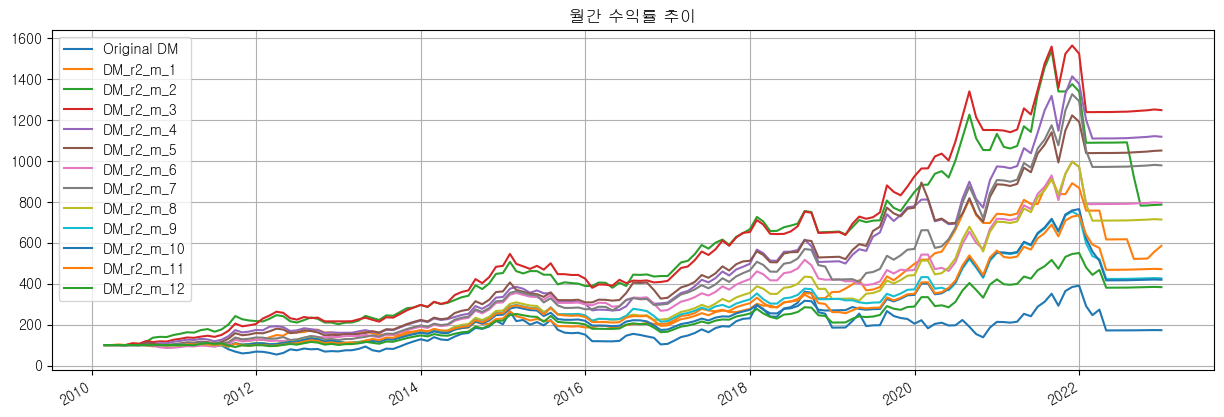

In [9]:
report.plot()
plt.title('월간 수익률 추이')

print(report.display())
print(report.display_monthly_returns())